In [1]:
import numpy as np
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng
rng = default_rng()

In [5]:
#read in STRAW data file
d = pd.read_csv("../../coincidence_analysis/unpacked.txt",delimiter='\t',header=None)
#/data/p-one/gaertner/2005_straw_data_tutorial/unpacked.txt
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

In [6]:
numbin = np.arange(0,max(time),1e6) #1million ns per ms
downhist = np.histogram(time[np.where(np.logical_and(channel==5,edge==0))],bins=numbin)
np.average(downhist[0])

33.81622330460847

# Better QE

In [2]:
fhits = np.loadtxt('Data/energyCounts.txt')
exphits = np.loadtxt('Data/expCounts.txt')
poihits = np.loadtxt('Data/poiCounts.txt')
glass = np.loadtxt('Data/glassCounts.txt')
m50 = np.loadtxt('Data/50ms.txt')
m100 = np.loadtxt('Data/100ms.txt')
#should be in SUMMER_STUDENTS/mens/data or something like that

In [7]:
#combine glass and water K40 hits along with dark rate
#add poission randomness to each data set to simulate dark rate of PMT
end = 100
dmed = np.median(downhist[0][:end])
med20 = np.median(poihits[:end]+glass[:end]+rng.poisson(lam=2.,size=end))
med50 = np.median(m50[:end]+glass[:end]+rng.poisson(lam=2.,size=end))
med100 = np.median(m100[:end]+glass[:end]+rng.poisson(lam=2.,size=end))
print(dmed)
print(med20)
print(med50)
print(med100)

9.0
3.571658988029613
4.643726700043177
5.2049048150996065


In [8]:
#get the STRAW data into a hist
tmax = max(time)
numbin = np.arange(0,tmax,1e6) #1million ns per ms
#numbin = 58619
downhist = np.histogram(time[np.where(np.logical_and(channel==5,edge==0))],bins=numbin)
print(tmax)

58718500000.0


<IPython.core.display.Javascript object>


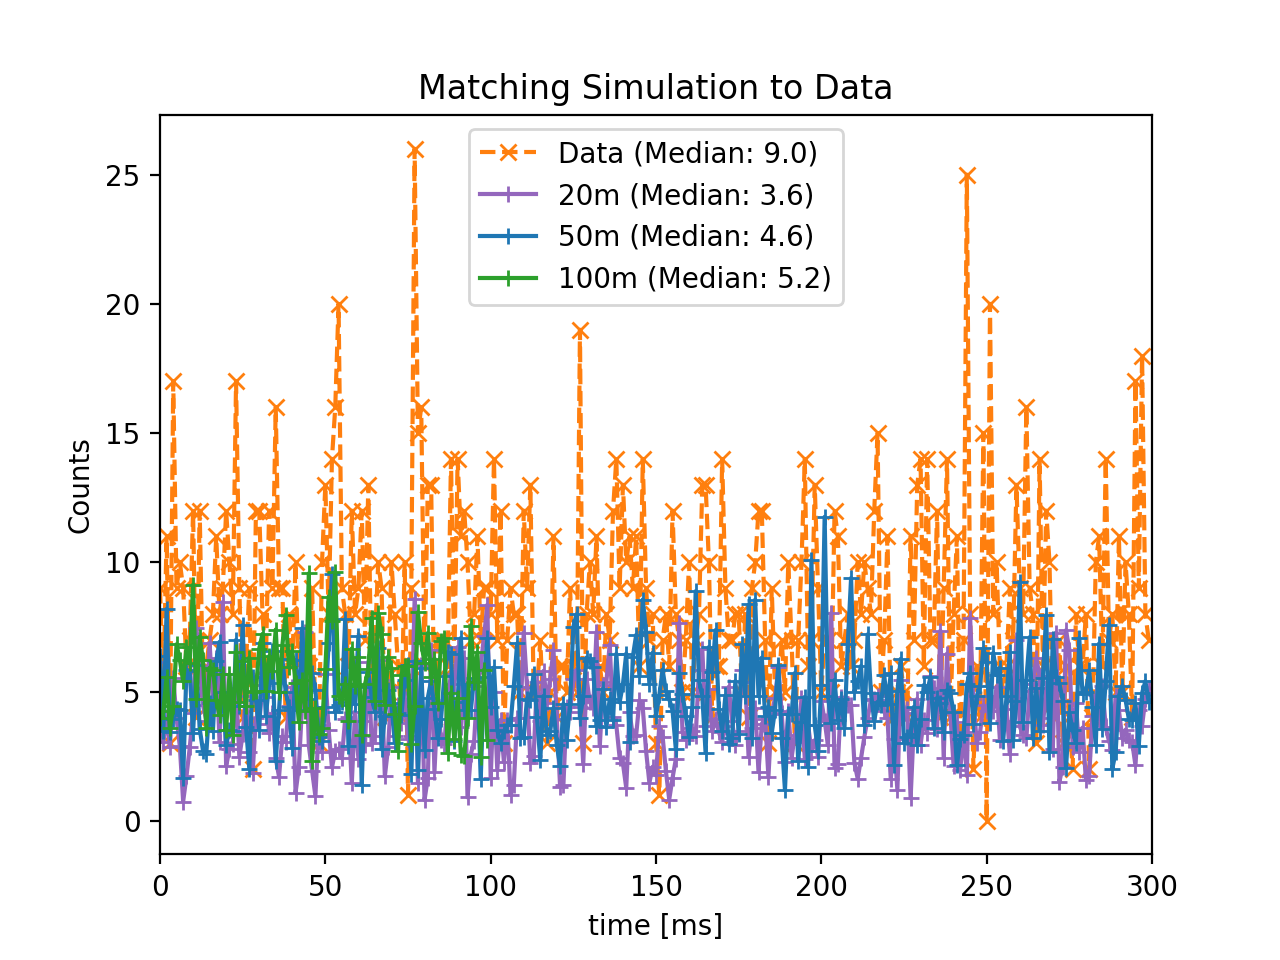

In [9]:
#plot everything on top of each other to see how the simulation gets closer to straw data
nend=300
end=100
plt.close()
plt.figure()
plt.plot(downhist[1][:nend]/1e6,downhist[0][:nend],'x--',label='Data (Median: %.1f)'%dmed,color="C1")
#plt.plot(downhist[1][:end15]/1e6,save15[:end15],'--+',label="15m same as 10m",color="C0")
#plt.plot(downhist[1][:end]/1e6,fhits[:end]+glass[:end]+2*np.ones(end),"-+",label="Flat+Glass", color="C2")
#plt.plot(downhist[1][:end]/1e6,exphits[:end],"-+",label="Exponential", color="C3")
plt.plot(downhist[1][:nend]/1e6,poihits[:nend]+glass[:nend]+rng.poisson(lam=2.,size=nend),"-+",label="20m (Median: %.1f)"%med20, color="C4")
#plt.plot([0,4000],[25,25],label='Acceptable values (Old)',color="C3")
plt.plot(downhist[1][:nend]/1e6,m50[:nend]+glass[:nend]+rng.poisson(lam=2.,size=nend),"-+",label="50m (Median: %.1f)"%med50,color="C0")
plt.plot(downhist[1][:end]/1e6,m100[:end]+glass[:end]+rng.poisson(lam=2.,size=end),"-+",label="100m (Median: %.1f)"%med100,color="C2")
plt.title("Matching Simulation to Data")
plt.legend(loc=0)
plt.xlabel("time [ms]")
plt.ylabel("Counts")
plt.xlim(0,300)
#plt.ylim(-1,40)
plt.show()

In [33]:
len(numbin)

58719